# Final analysis

In [41]:
import pandas as pd

# Load the uploaded CSV file
file_path = '../batch_data_final_2.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

In [42]:

# Define the columns
parameter_columns = [
    'RunId',
    'Step', 
    'has_regulation', 
    'num_month_rent_renovation', 
    'rent_increase_differential', 
    'max_complaint', 
    'rent_discount', 
    'init_num_people', 
    'base_decay_constant'
]

metric_columns_to_split = [
    "mean_quality",
    'mean_complaints', 
    'mean_displacement', 
    'mean_housing_quality', 
    'mean_rent_price', 
    'hh_low_quality', 
    'hh_rent_regulation', 
    'attempt', 
    'attempt_li'
]

# Convert metric columns to string and separate them
for col in metric_columns_to_split:
    data[col] = data[col].astype(str)
    data[[f'{col}_1', f'{col}_2']] = data[col].str.extract(r'\(([^,]+), ([^)]+)\)').astype(float)

# Define the new metric columns after separation
new_metric_columns = [f'{col}_{i}' for col in metric_columns_to_split for i in ['1', '2']]

# Include 'movement' and 'movement_li' without splitting
new_metric_columns.extend(['movement', 'movement_li'])

# Group by the parameter columns (excluding iteration) and calculate the mean of the new metric columns over iterations
grouped_data = data.groupby(parameter_columns)[new_metric_columns].mean().reset_index()



In [43]:
grouped_data.columns.tolist()


['RunId',
 'Step',
 'has_regulation',
 'num_month_rent_renovation',
 'rent_increase_differential',
 'max_complaint',
 'rent_discount',
 'init_num_people',
 'base_decay_constant',
 'mean_quality_1',
 'mean_quality_2',
 'mean_complaints_1',
 'mean_complaints_2',
 'mean_displacement_1',
 'mean_displacement_2',
 'mean_housing_quality_1',
 'mean_housing_quality_2',
 'mean_rent_price_1',
 'mean_rent_price_2',
 'hh_low_quality_1',
 'hh_low_quality_2',
 'hh_rent_regulation_1',
 'hh_rent_regulation_2',
 'attempt_1',
 'attempt_2',
 'attempt_li_1',
 'attempt_li_2',
 'movement',
 'movement_li']

In [44]:
# Define the original column names
original_columns = [
    'RunId', 'Step', 'has_regulation', 'num_month_rent_renovation',
    'rent_increase_differential', 'max_complaint', 'rent_discount',
    'init_num_people', 'base_decay_constant', 'mean_quality_1', 'mean_quality_2',
    'mean_complaints_1', 'mean_complaints_2', 'mean_displacement_1', 'mean_displacement_2',
    'mean_housing_quality_1', 'mean_housing_quality_2', 'mean_rent_price_1', 'mean_rent_price_2',
    'hh_low_quality_1', 'hh_low_quality_2', 'hh_rent_regulation_1', 'hh_rent_regulation_2',
    'attempt_1', 'attempt_2', 'attempt_li_1', 'attempt_li_2', 'movement', 'movement_li'
]

# Define the new column names based on the provided rules
new_columns = [
    'RunId', 'Step', 'has_regulation', 'num_month_rent_renovation',
    'rent_increase_differential', 'max_complaint', 'rent_discount',
    'init_num_people', 'base_decay_constant', 'mean_quality_regular', 'mean_quality_low_income',
    'mean_complaints_regular', 'mean_complaints_low_income', 'mean_displacement_regular', 'mean_displacement_low_income',
    'mean_housing_quality_regular', 'mean_housing_quality_low_income', 'mean_rent_price_regular', 'mean_rent_price_low_income',
    'hh_low_quality_regular', 'hh_low_quality_low_income', 'hh_rent_regulation_regulated', 'hh_rent_regulation_not_regulated',
    'attempt_high_rent', 'attempt_low_quality', 'attempt_li_high_rent', 'attempt_li_low_quality', 'movement', 'movement_li'
]

# Create a dictionary to map original column names to new column names
column_mapping = dict(zip(original_columns, new_columns))

# Assuming 'data' is your DataFrame
grouped_data = grouped_data.rename(columns=column_mapping)

# Display the renamed columns to verify
print(grouped_data.columns)


Index(['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation',
       'rent_increase_differential', 'max_complaint', 'rent_discount',
       'init_num_people', 'base_decay_constant', 'mean_quality_regular',
       'mean_quality_low_income', 'mean_complaints_regular',
       'mean_complaints_low_income', 'mean_displacement_regular',
       'mean_displacement_low_income', 'mean_housing_quality_regular',
       'mean_housing_quality_low_income', 'mean_rent_price_regular',
       'mean_rent_price_low_income', 'hh_low_quality_regular',
       'hh_low_quality_low_income', 'hh_rent_regulation_regulated',
       'hh_rent_regulation_not_regulated', 'attempt_high_rent',
       'attempt_low_quality', 'attempt_li_high_rent', 'attempt_li_low_quality',
       'movement', 'movement_li'],
      dtype='object')


In [45]:
grouped_data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation',
       'rent_increase_differential', 'max_complaint', 'rent_discount',
       'init_num_people', 'base_decay_constant', 'mean_quality_regular',
       'mean_quality_low_income', 'mean_complaints_regular',
       'mean_complaints_low_income', 'mean_displacement_regular',
       'mean_displacement_low_income', 'mean_housing_quality_regular',
       'mean_housing_quality_low_income', 'mean_rent_price_regular',
       'mean_rent_price_low_income', 'hh_low_quality_regular',
       'hh_low_quality_low_income', 'hh_rent_regulation_regulated',
       'hh_rent_regulation_not_regulated', 'attempt_high_rent',
       'attempt_low_quality', 'attempt_li_high_rent', 'attempt_li_low_quality',
       'movement', 'movement_li'],
      dtype='object')>

In [46]:
grouped_data

RunId  Step  has_regulation  num_month_rent_renovation  \
0        0     0            True                          3   
1        0     2            True                          3   
2        0     4            True                          3   
3        0     6            True                          3   
4        0     8            True                          3   
..     ...   ...             ...                        ...   
655     59    12            True                          6   
656     59    14            True                          6   
657     59    16            True                          6   
658     59    18            True                          6   
659     59    20            True                          6   

     rent_increase_differential  max_complaint  rent_discount  \
0                          0.08              4            0.5   
1                          0.08              4            0.5   
2                          0.08              4            0.5   
3                          0.08              4            0.5   
4                          0.08              4            0.5   
..                          ...            ...            ...   
655                        0.15              4            0.5   
656                        0.15              4            0.5   
657                        0.15              4            0.5   
658                        0.15              4            0.5   
659                        0.15              4            0.5   

     init_num_people  base_decay_constant  mean_quality_regular  ...  \
0                  2                 0.15             71.777639  ...   
1                  2                 0.15             72.704143  ...   
2                  2                 0.15             71.946165  ...   
3                  2                 0.15             74.755448  ...   
4                  2                 0.15             74.525147  ...   
..               ...                  ...                   ...  ...   
655                2                 0.15             64.862008  ...   
656                2                 0.15             60.534355  ...   
657                2                 0.15             62.712371  ...   
658                2                 0.15             59.821679  ...   
659                2                 0.15             61.652581  ...   

     hh_low_quality_regular  hh_low_quality_low_income  \
0                       0.0                        0.0   
1                      32.0                       12.0   
2                      35.0                       18.0   
3                      31.0                       18.0   
4                      26.0                       17.0   
..                      ...                        ...   
655                    33.0                       14.0   
656                    51.0                       14.0   
657                    41.0                       12.0   
658                    59.0                       15.0   
659                    38.0                       15.0   

     hh_rent_regulation_regulated  hh_rent_regulation_not_regulated  \
0                           140.0                             168.0   
1                           159.0                             149.0   
2                           151.0                             157.0   
3                           146.0                             162.0   
4                           146.0                             162.0   
..                            ...                               ...   
655                         175.0                             133.0   
656                         175.0                             133.0   
657                         175.0                             133.0   
658                         175.0                             133.0   
659                         175.0                             133.0   

     attempt_high_rent  attempt_low_quality  attempt

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

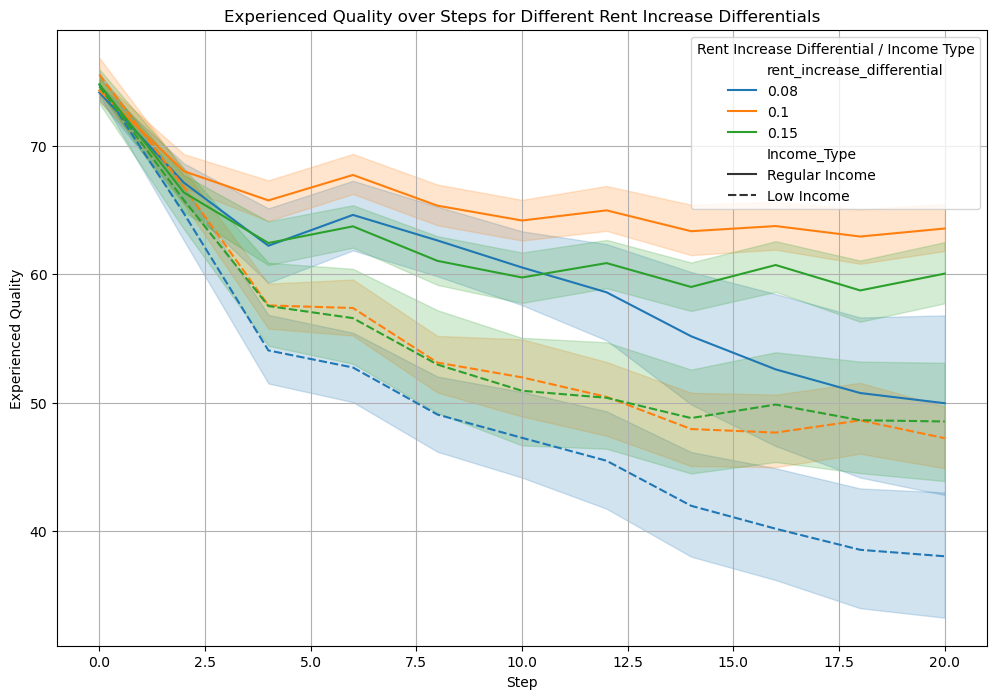

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to have a long format suitable for seaborn
melted_data = pd.melt(grouped_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_quality_regular', 'mean_quality_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Quality')

# Rename the income type labels for clarity
melted_data['Income_Type'] = melted_data['Income_Type'].replace({
    'mean_quality_regular': 'Regular Income',
    'mean_quality_low_income': 'Low Income'
})

# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality over Step for different rent_increase_differentials and income types
sns.lineplot(
    data=melted_data,
    x='Step',
    y='Mean_Quality',
    hue='rent_increase_differential',
    style='Income_Type',
    palette='tab10'
)

# Adding titles and labels
plt.title('Experienced Quality over Steps for Different Rent Increase Differentials')
plt.xlabel('Step')
plt.ylabel('Experienced Quality')
plt.legend(title='Rent Increase Differential / Income Type')
plt.grid(True)
plt.show()


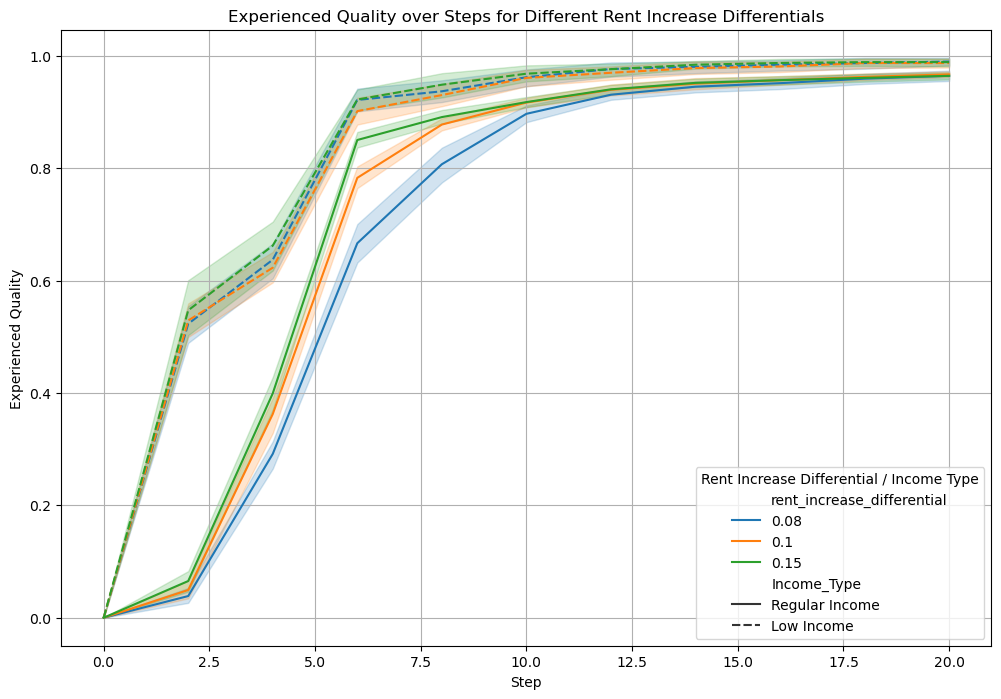

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe to have a long format suitable for seaborn
melted_data = pd.melt(grouped_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_displacement_regular', 'mean_displacement_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Displacement')

# Rename the income type labels for clarity
melted_data['Income_Type'] = melted_data['Income_Type'].replace({
    'mean_displacement_regular': 'Regular Income',
    'mean_displacement_low_income': 'Low Income'
})

# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality over Step for different rent_increase_differentials and income types
sns.lineplot(
    data=melted_data,
    x='Step',
    y='Mean_Displacement',
    hue='rent_increase_differential',
    style='Income_Type',
    palette='tab10'
)

# Adding titles and labels
plt.title('Experienced Quality over Steps for Different Rent Increase Differentials')
plt.xlabel('Step')
plt.ylabel('Experienced Quality')
plt.legend(title='Rent Increase Differential / Income Type')
plt.grid(True)
plt.show()


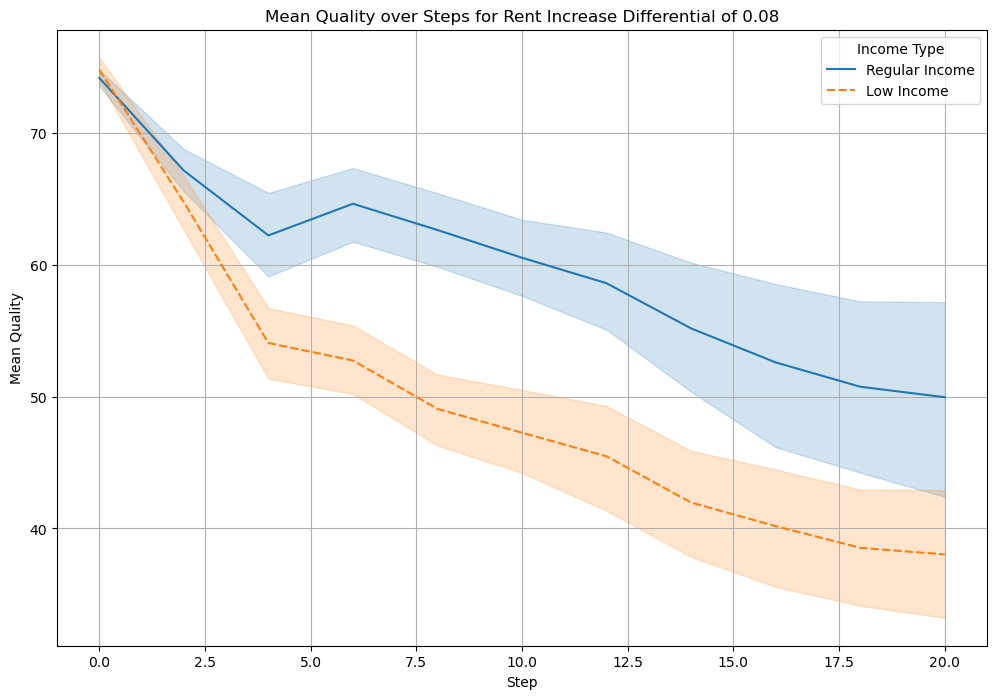

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset to keep only rows where rent_increase_differential is 0.08
filtered_data = grouped_data[grouped_data['rent_increase_differential'] == 0.08]

# Melt the dataframe to have a long format suitable for seaborn
melted_data = pd.melt(filtered_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_quality_regular', 'mean_quality_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Quality')

# Rename the income type labels for clarity
melted_data['Income_Type'] = melted_data['Income_Type'].replace({
    'mean_quality_regular': 'Regular Income',
    'mean_quality_low_income': 'Low Income'
})

# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality over Step for different income types
sns.lineplot(
    data=melted_data,
    x='Step',
    y='Mean_Quality',
    hue='Income_Type',
    style='Income_Type',
    palette='tab10'
)

# Adding titles and labels
plt.title('Mean Quality over Steps for Rent Increase Differential of 0.08')
plt.xlabel('Step')
plt.ylabel('Mean Quality')
plt.legend(title='Income Type')
plt.grid(True)
plt.show()


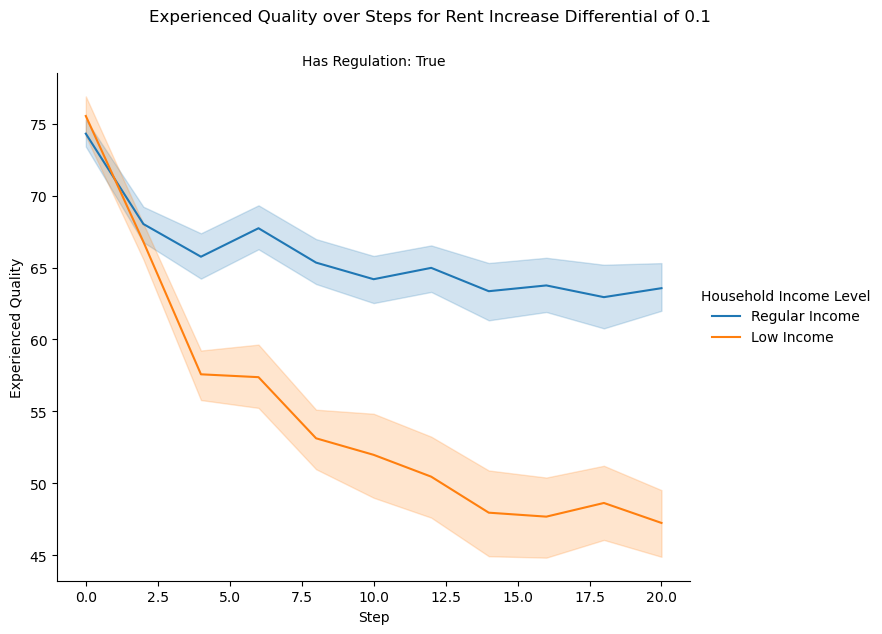

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset to keep only rows where rent_increase_differential is 0.08
filtered_data = grouped_data[grouped_data['rent_increase_differential'] == 0.1]

# Melt the dataframe to have a long format suitable for seaborn
melted_data = pd.melt(filtered_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_quality_regular', 'mean_quality_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Quality')

# Rename the income type labels for clarity
melted_data['Income_Type'] = melted_data['Income_Type'].replace({
    'mean_quality_regular': 'Regular Income',
    'mean_quality_low_income': 'Low Income'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Mean_Quality', hue='Income_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Experienced Quality')
g.add_legend(title='Household Income Level')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Experienced Quality over Steps for Rent Increase Differential of 0.1', y=1.05)
plt.show()


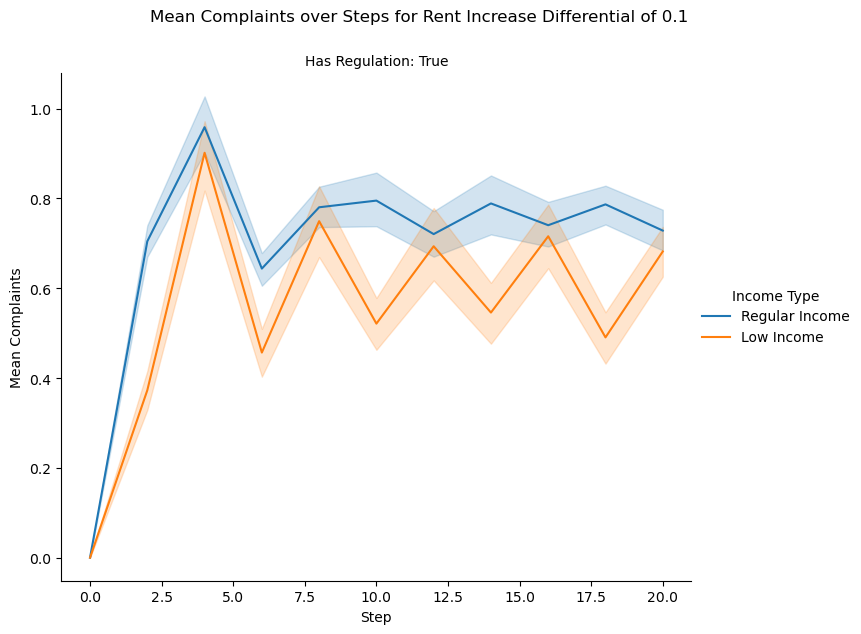

In [51]:
# Melt the dataframe for mean_complaints
melted_complaints_data = pd.melt(filtered_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_complaints_regular', 'mean_complaints_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Complaints')

# Rename the income type labels for clarity
melted_complaints_data['Income_Type'] = melted_complaints_data['Income_Type'].replace({
    'mean_complaints_regular': 'Regular Income',
    'mean_complaints_low_income': 'Low Income'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_complaints_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Mean_Complaints', hue='Income_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Mean Complaints')
g.add_legend(title='Income Type')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Mean Complaints over Steps for Rent Increase Differential of 0.1', y=1.05)
plt.show()


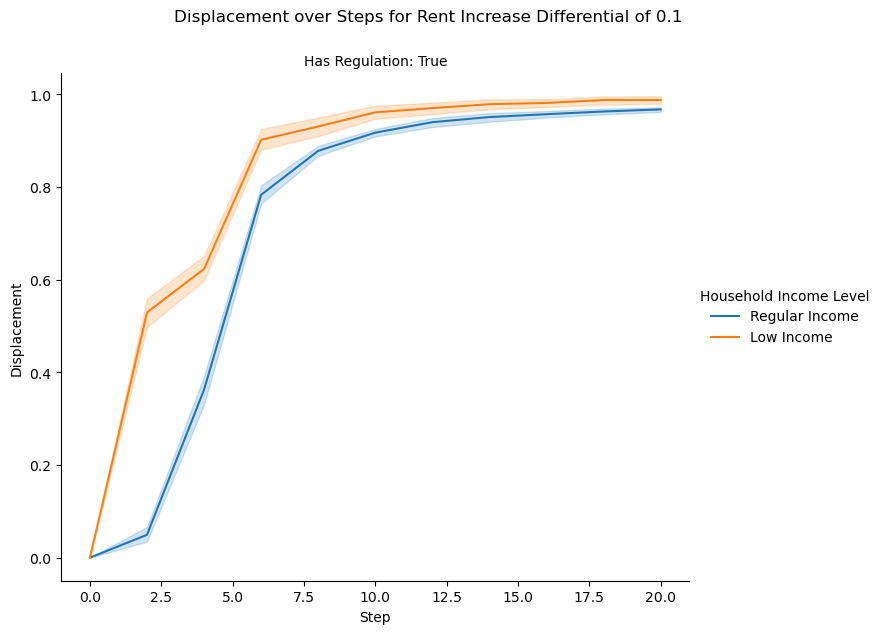

In [52]:
# Melt the dataframe for mean_displacement
melted_displacement_data = pd.melt(filtered_data, 
                      id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                      value_vars=['mean_displacement_regular', 'mean_displacement_low_income'],
                      var_name='Income_Type', 
                      value_name='Mean_Displacement')

# Rename the income type labels for clarity
melted_displacement_data['Income_Type'] = melted_displacement_data['Income_Type'].replace({
    'mean_displacement_regular': 'Regular Income',
    'mean_displacement_low_income': 'Low Income'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_displacement_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Mean_Displacement', hue='Income_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Displacement')
g.add_legend(title='Household Income Level')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Displacement over Steps for Rent Increase Differential of 0.1', y=1.05)
plt.show()


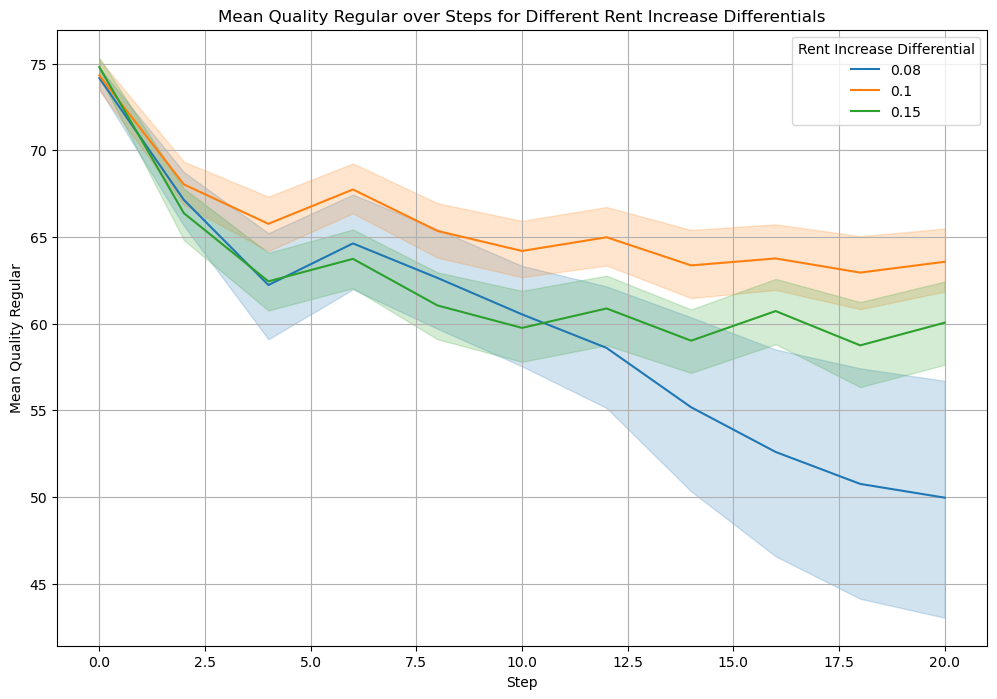

In [53]:
# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality_regular over Step for different rent_increase_differentials
sns.lineplot(
    data=grouped_data,
    x='Step',
    y='mean_quality_regular',
    hue='rent_increase_differential',
    palette='tab10'
)

# Adding titles and labels
plt.title('Mean Quality Regular over Steps for Different Rent Increase Differentials')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

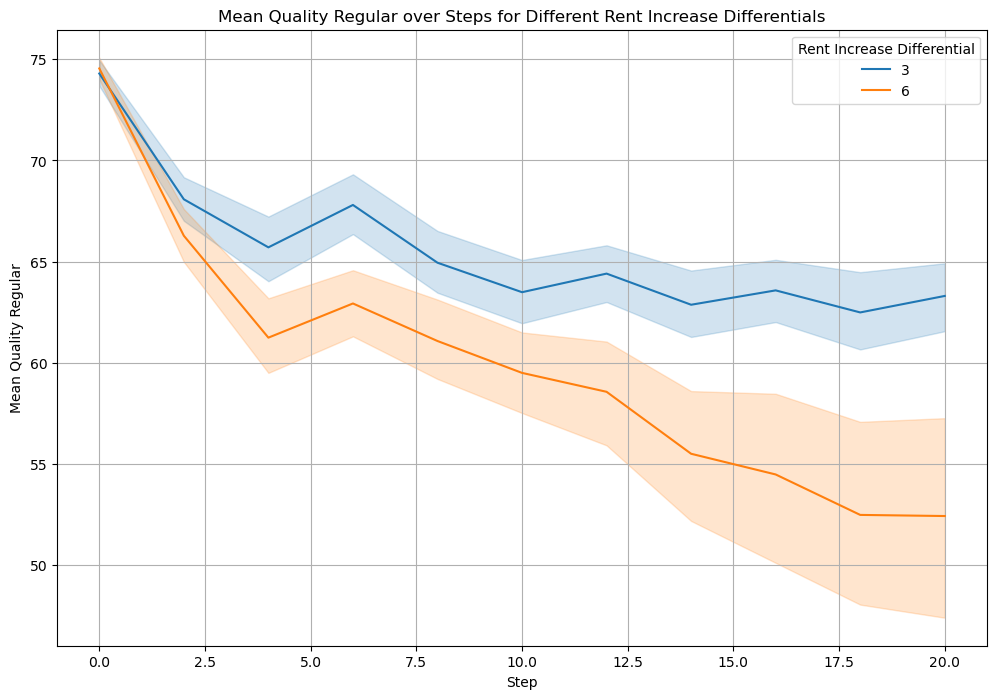

In [57]:
# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality_regular over Step for different rent_increase_differentials
sns.lineplot(
    data=grouped_data,
    x='Step',
    y='mean_quality_regular',
    hue='num_month_rent_renovation',
    palette='tab10'
)

# Adding titles and labels
plt.title('Mean Quality Regular over Steps for Different Rent Increase Differentials')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

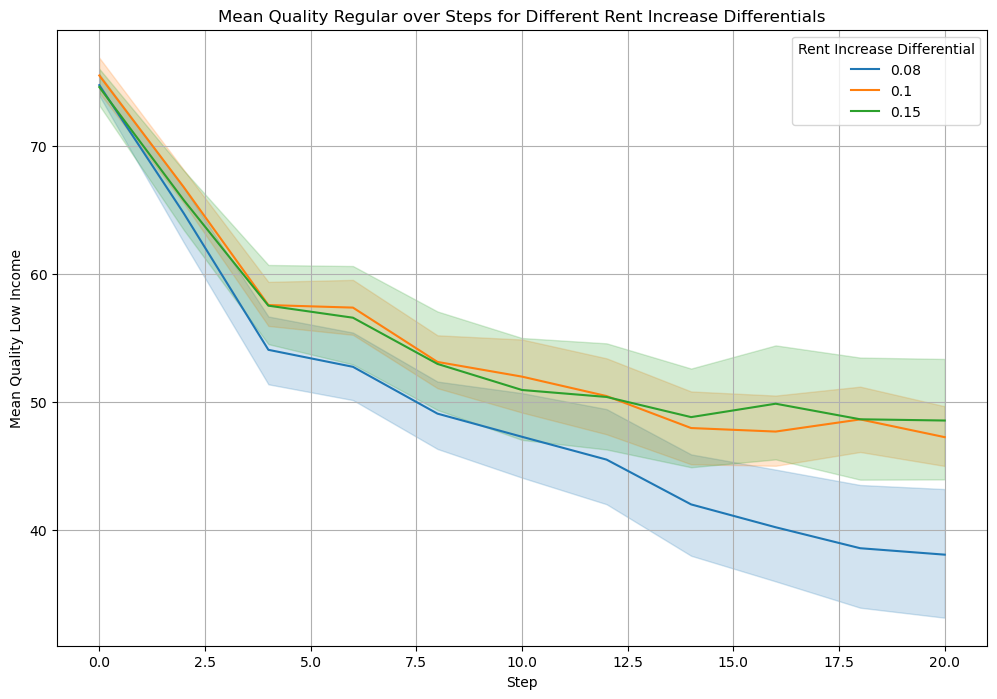

In [54]:
# Plotting using seaborn
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot mean_quality_regular over Step for different rent_increase_differentials
sns.lineplot(
    data=grouped_data,
    x='Step',
    y='mean_quality_low_income',
    hue='rent_increase_differential',
    palette='tab10'
)

# Adding titles and labels
plt.title('Mean Quality Regular over Steps for Different Rent Increase Differentials')
plt.xlabel('Step')
plt.ylabel('Mean Quality Low Income')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

/tmp/ipykernel_5452/4242117851.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


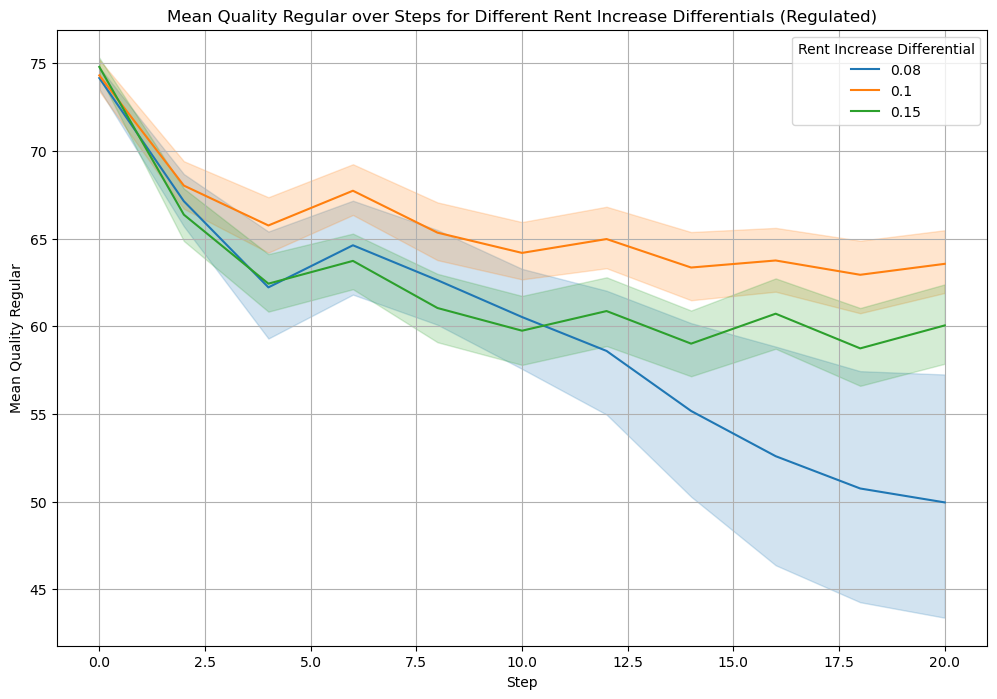

/tmp/ipykernel_5452/4242117851.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(
/tmp/ipykernel_5452/4242117851.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


TypeError: 'NoneType' object is not iterable

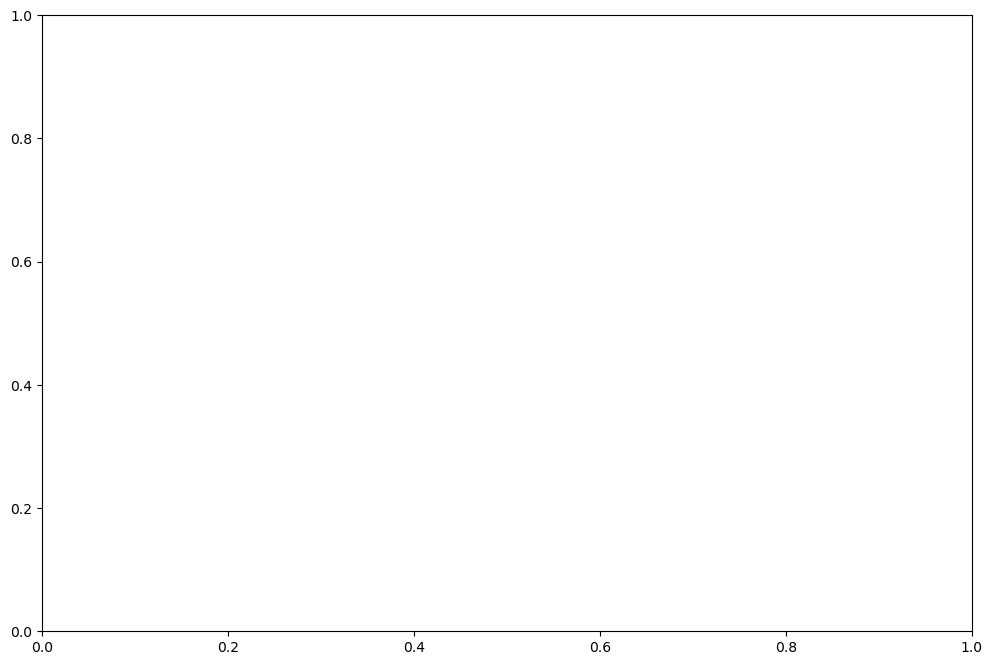

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='mean_quality_regular',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Regular over Steps for Different Rent Increase Differentials (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='mean_quality_regular',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Regular over Steps for Different Rent Increase Differentials (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()


/tmp/ipykernel_5452/4157504489.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


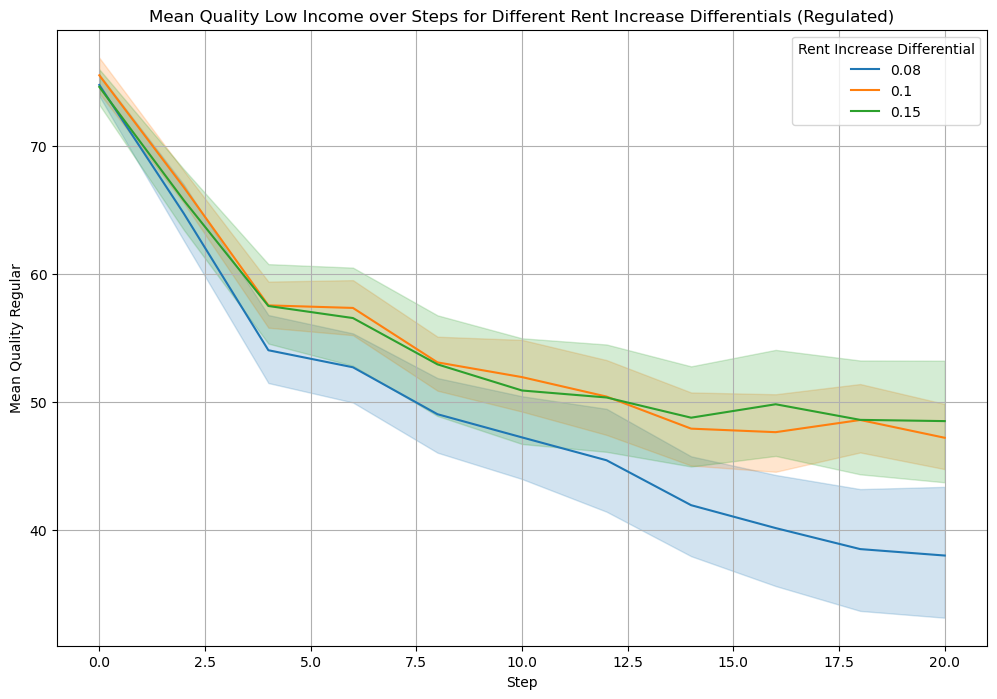

/tmp/ipykernel_5452/4157504489.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(
/tmp/ipykernel_5452/4157504489.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


TypeError: 'NoneType' object is not iterable

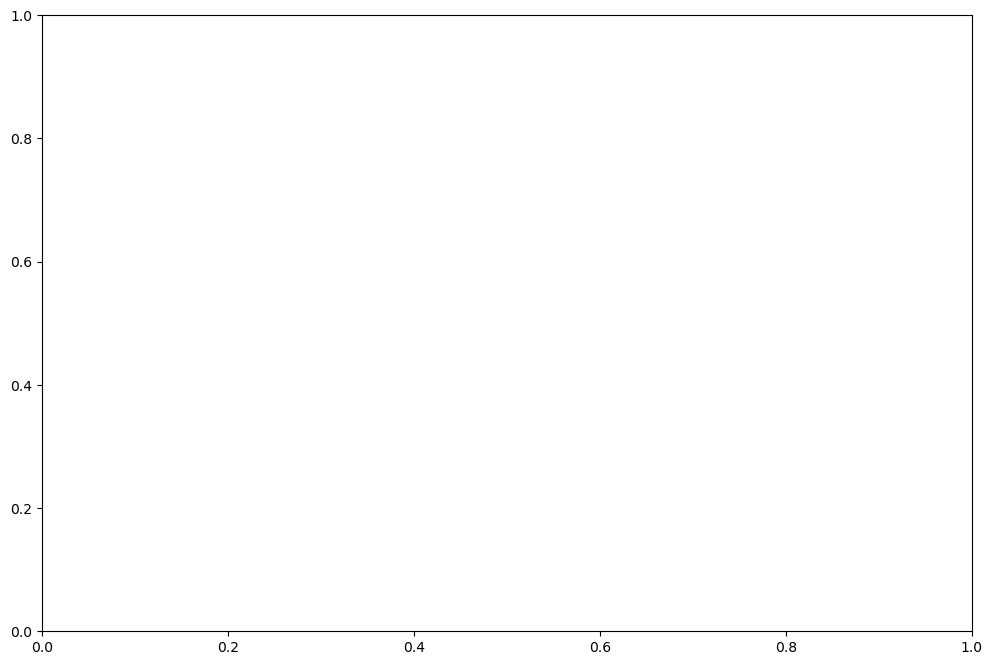

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='mean_quality_low_income',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Low Income over Steps for Different Rent Increase Differentials (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='mean_quality_regular',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Low Income over Steps for Different Rent Increase Differentials (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()


/tmp/ipykernel_5452/2023694392.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


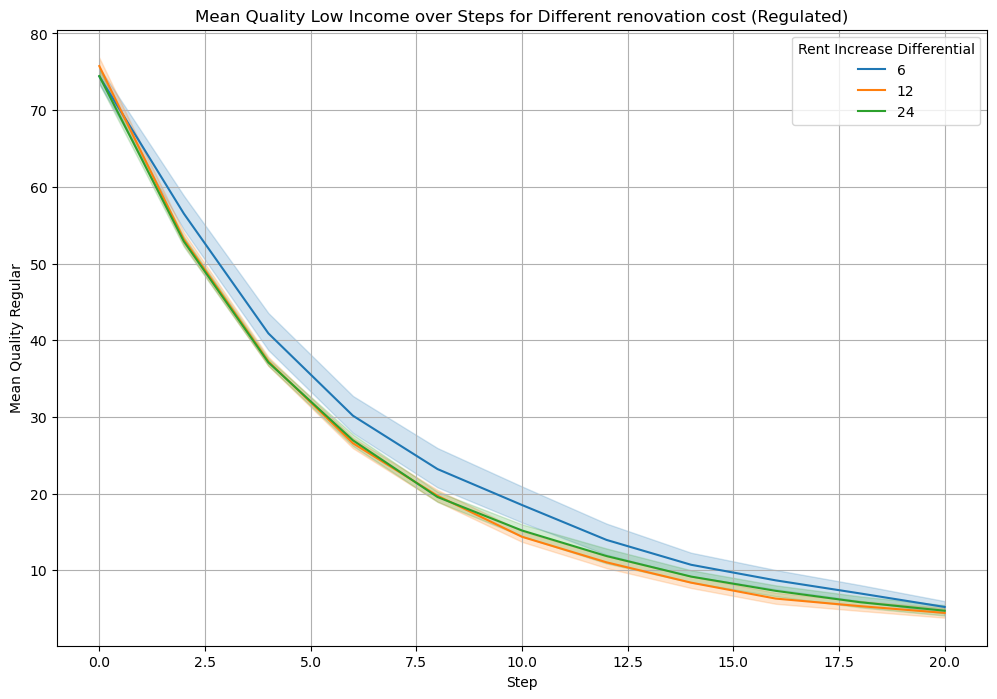

/tmp/ipykernel_5452/2023694392.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


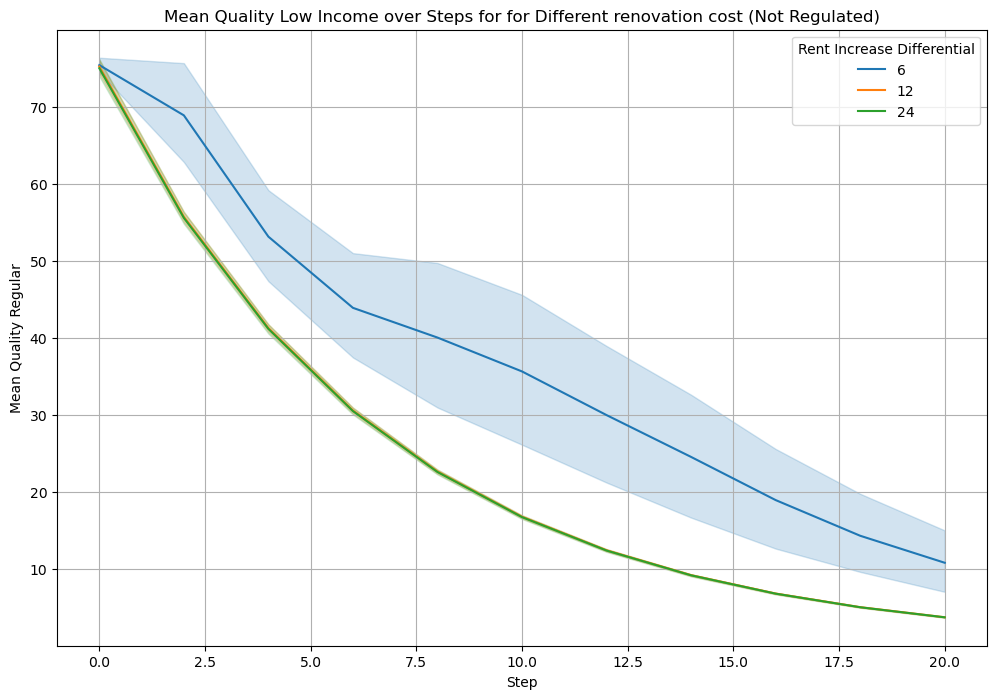

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='mean_quality_low_income',
    hue='num_month_rent_renovation',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Low Income over Steps for Different renovation cost (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='mean_quality_low_income',
    hue='num_month_rent_renovation',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Quality Low Income over Steps for for Different renovation cost (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()


/tmp/ipykernel_5452/1628228626.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


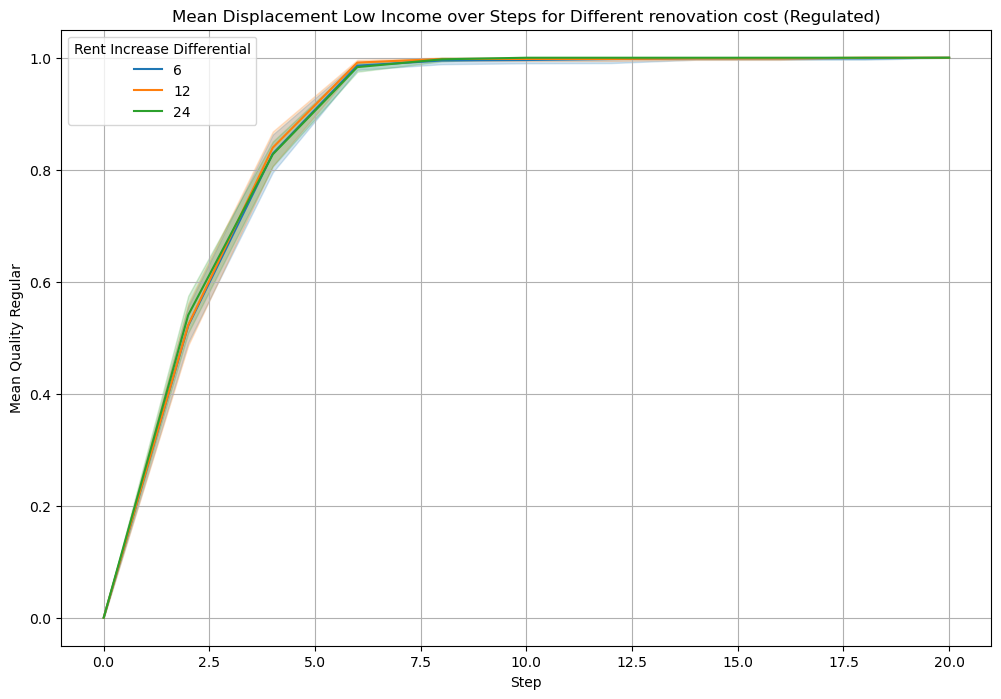

/tmp/ipykernel_5452/1628228626.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


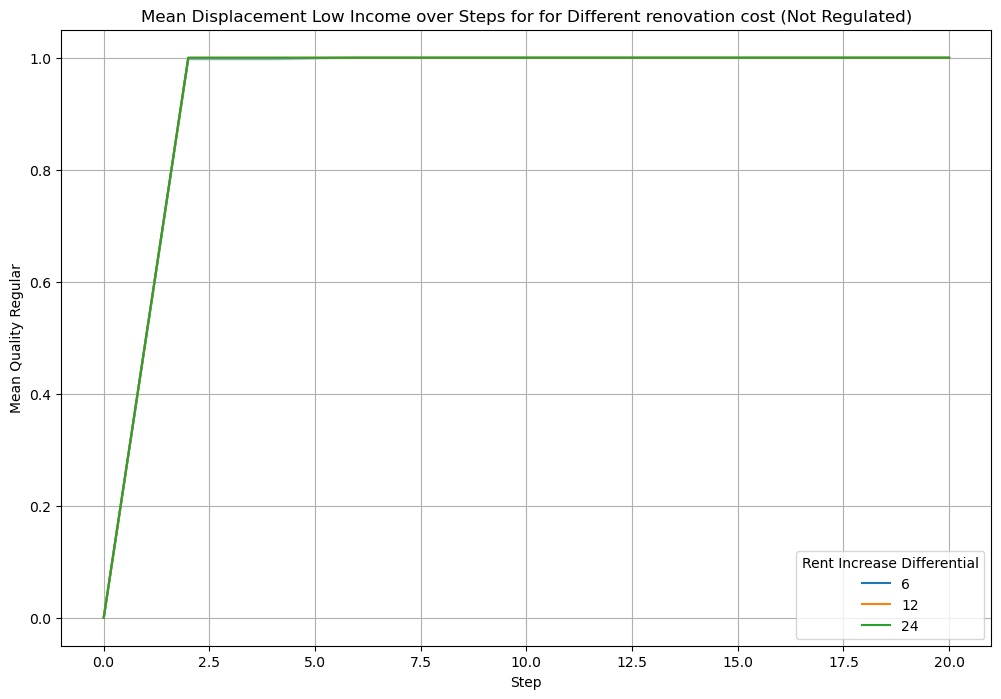

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='mean_displacement_low_income',
    hue='num_month_rent_renovation',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for Different renovation cost (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='mean_displacement_low_income',
    hue='num_month_rent_renovation',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for for Different renovation cost (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()


/tmp/ipykernel_5452/3535181421.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


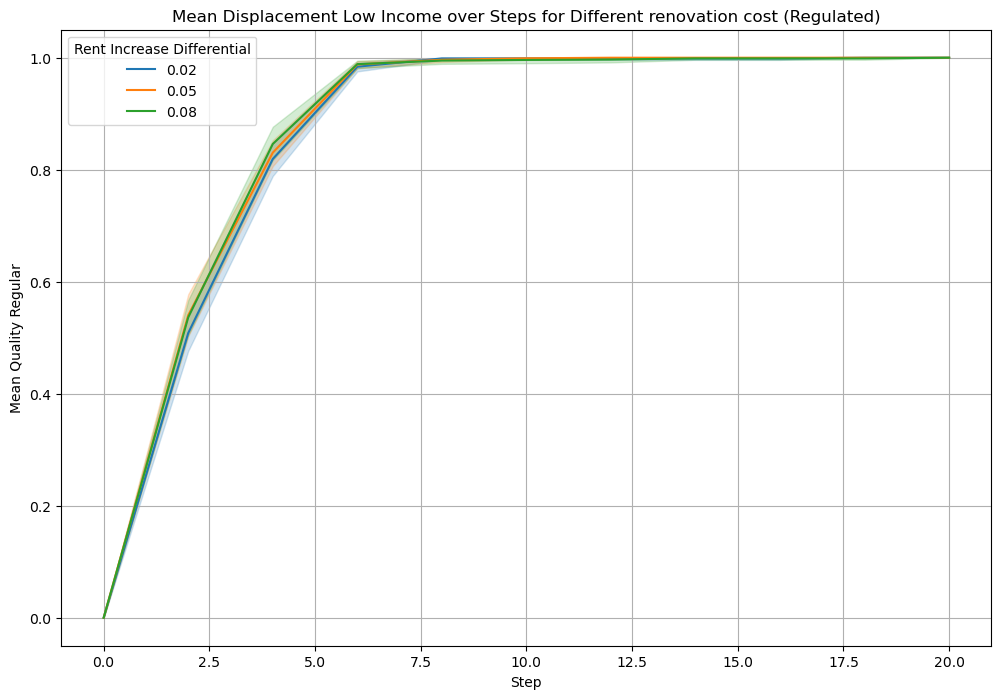

/tmp/ipykernel_5452/3535181421.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


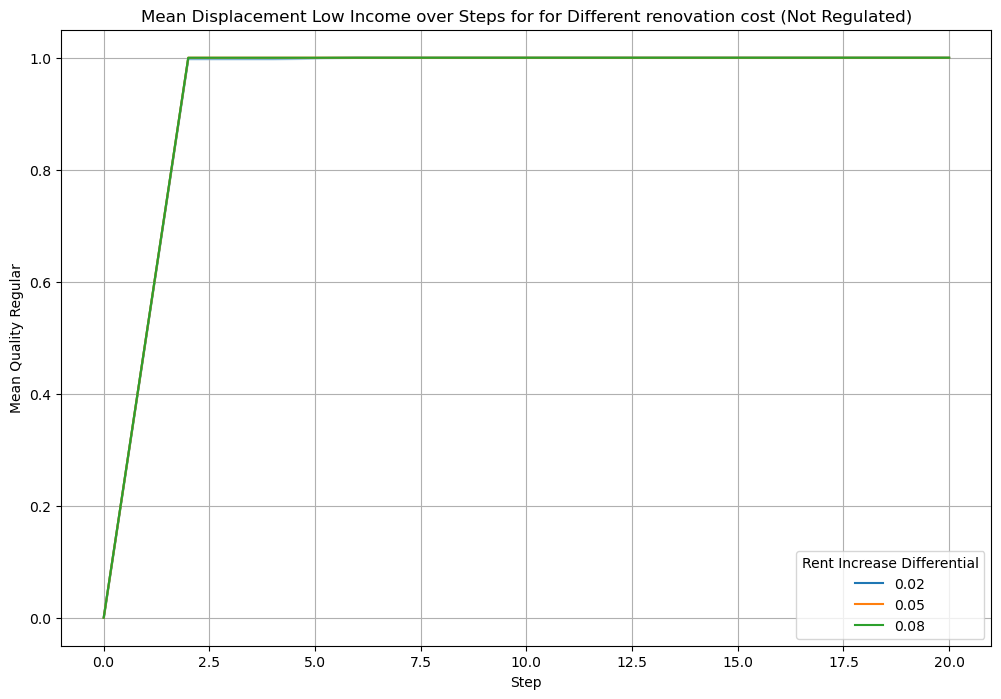

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='mean_displacement_low_income',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for Different renovation cost (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='mean_displacement_low_income',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for for Different renovation cost (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()


/tmp/ipykernel_5452/3132055903.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


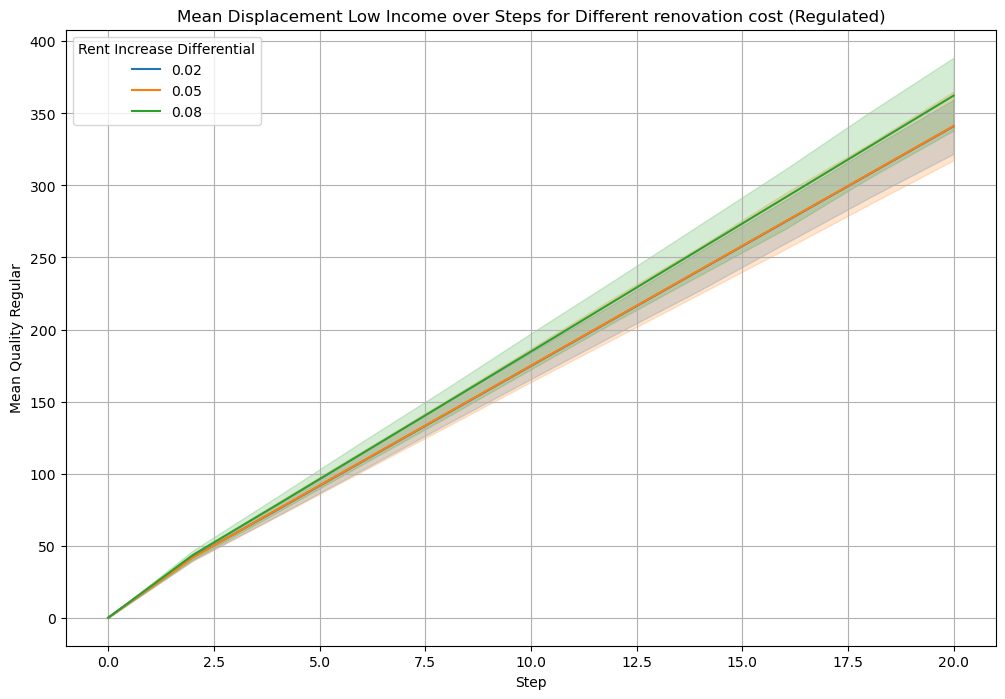

/tmp/ipykernel_5452/3132055903.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


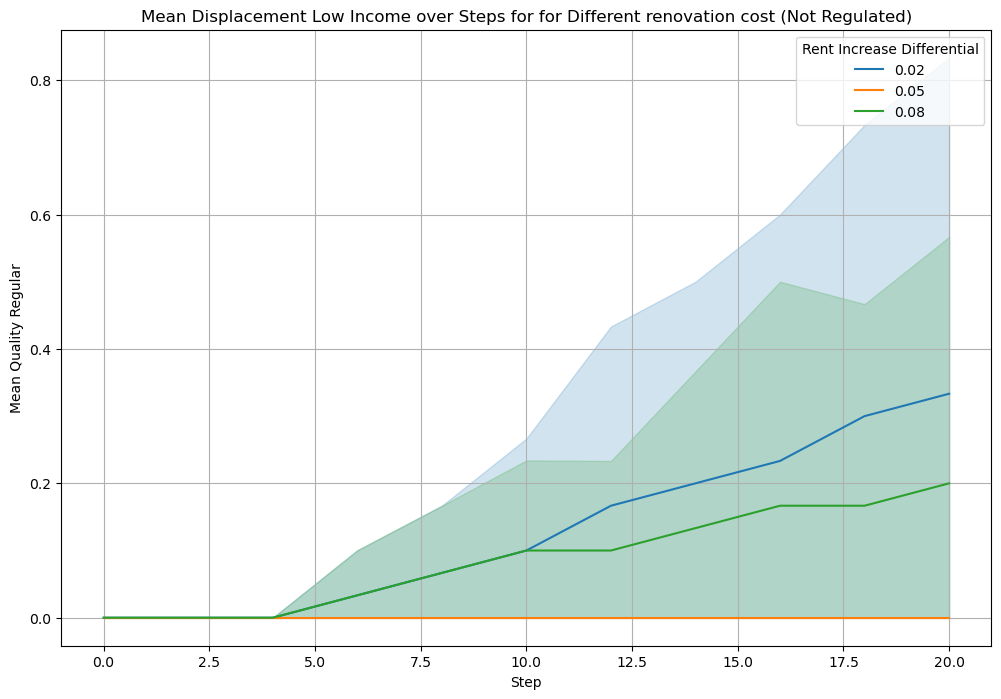

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='attempt_li_high_rent',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for Different renovation cost (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='attempt_li_low_quality',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for for Different renovation cost (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

/tmp/ipykernel_5452/3585244033.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


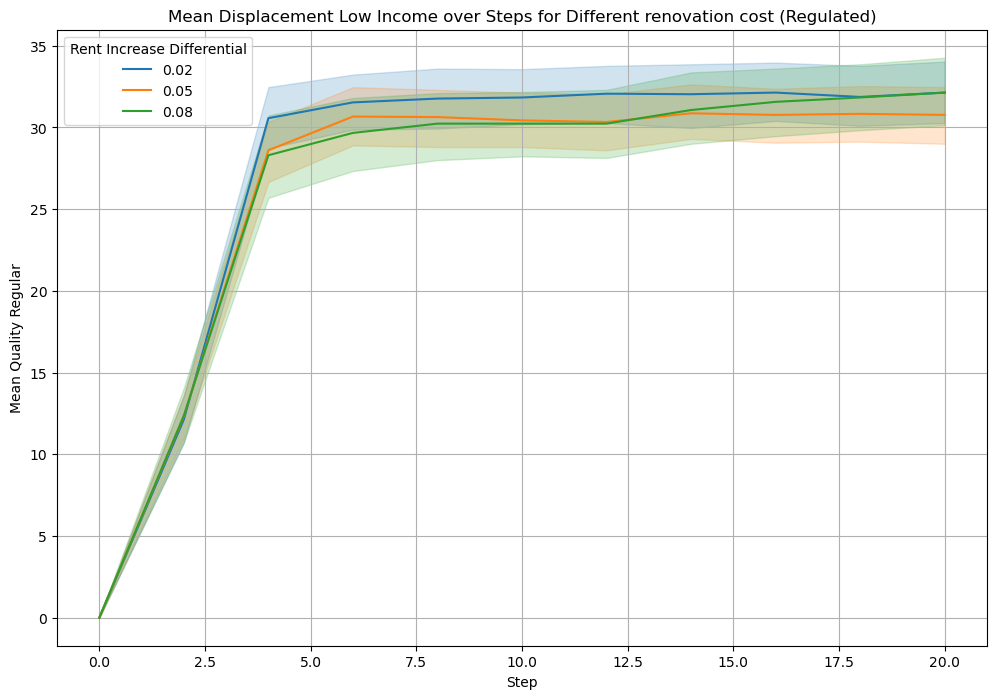

/tmp/ipykernel_5452/3585244033.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


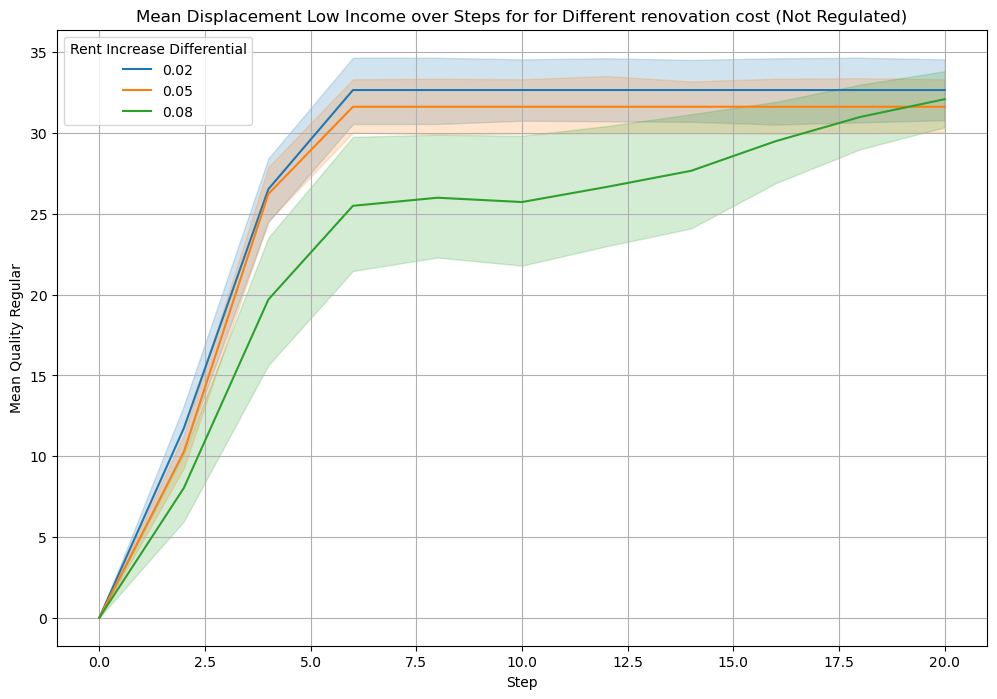

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the dataset by has_regulation
data_regulated = grouped_data[grouped_data['has_regulation'] == True]
data_not_regulated = grouped_data[grouped_data['has_regulation'] == False]

# Plotting for regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_regulated,
    x='Step',
    y='hh_low_quality_low_income',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for Different renovation cost (Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

# Plotting for not regulated data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data_not_regulated,
    x='Step',
    y='hh_low_quality_low_income',
    hue='rent_increase_differential',
    palette='tab10',
    ci=95  # Custom confidence interval (default is 95)
)
plt.title('Mean Displacement Low Income over Steps for for Different renovation cost (Not Regulated)')
plt.xlabel('Step')
plt.ylabel('Mean Quality Regular')
plt.legend(title='Rent Increase Differential')
plt.grid(True)
plt.show()

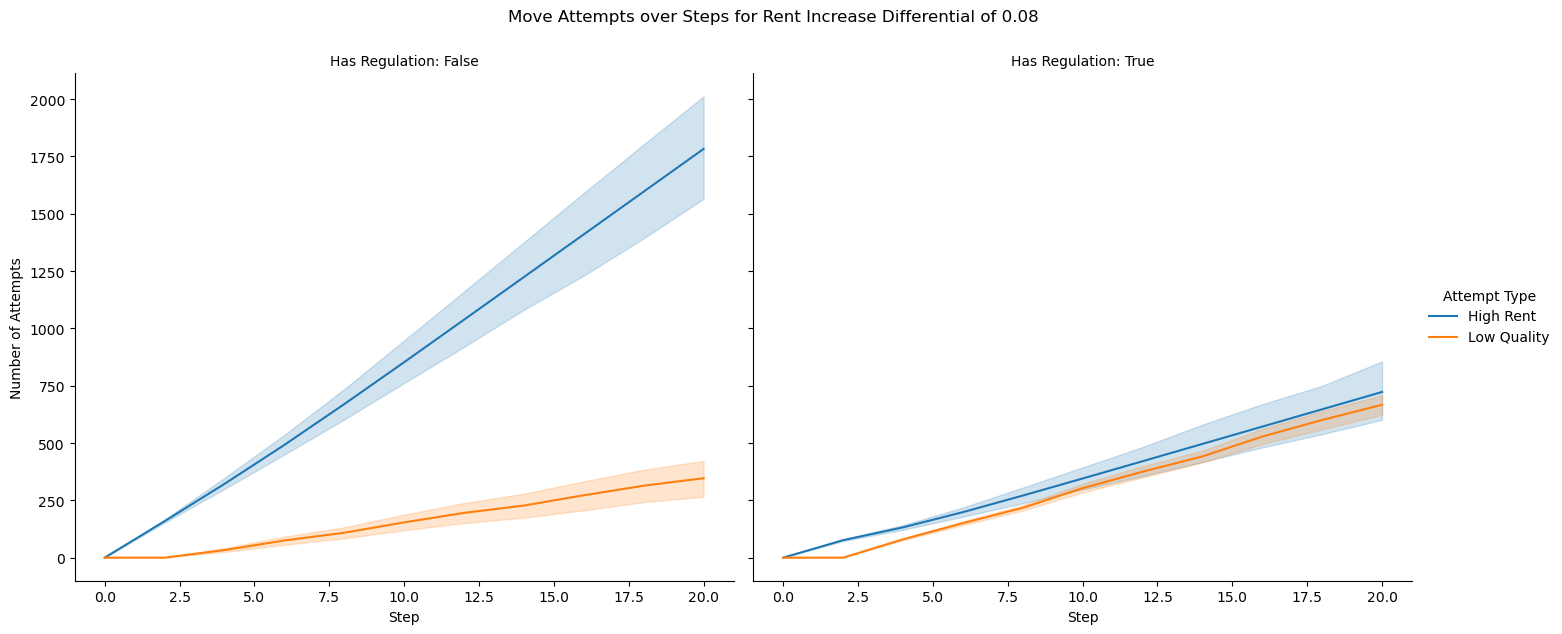

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset to keep only rows where rent_increase_differential is 0.08
filtered_data = grouped_data[grouped_data['rent_increase_differential'] == 0.08]

# Melt the dataframe for attempt variables
melted_attempt_data = pd.melt(filtered_data, 
                              id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                              value_vars=['attempt_high_rent', 'attempt_low_quality'],
                              var_name='Attempt_Type', 
                              value_name='Attempts')

# Rename the attempt type labels for clarity
melted_attempt_data['Attempt_Type'] = melted_attempt_data['Attempt_Type'].replace({
    'attempt_high_rent': 'High Rent',
    'attempt_low_quality': 'Low Quality'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_attempt_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Attempts', hue='Attempt_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Number of Attempts')
g.add_legend(title='Attempt Type')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Move Attempts over Steps for Rent Increase Differential of 0.08', y=1.05)
plt.show()


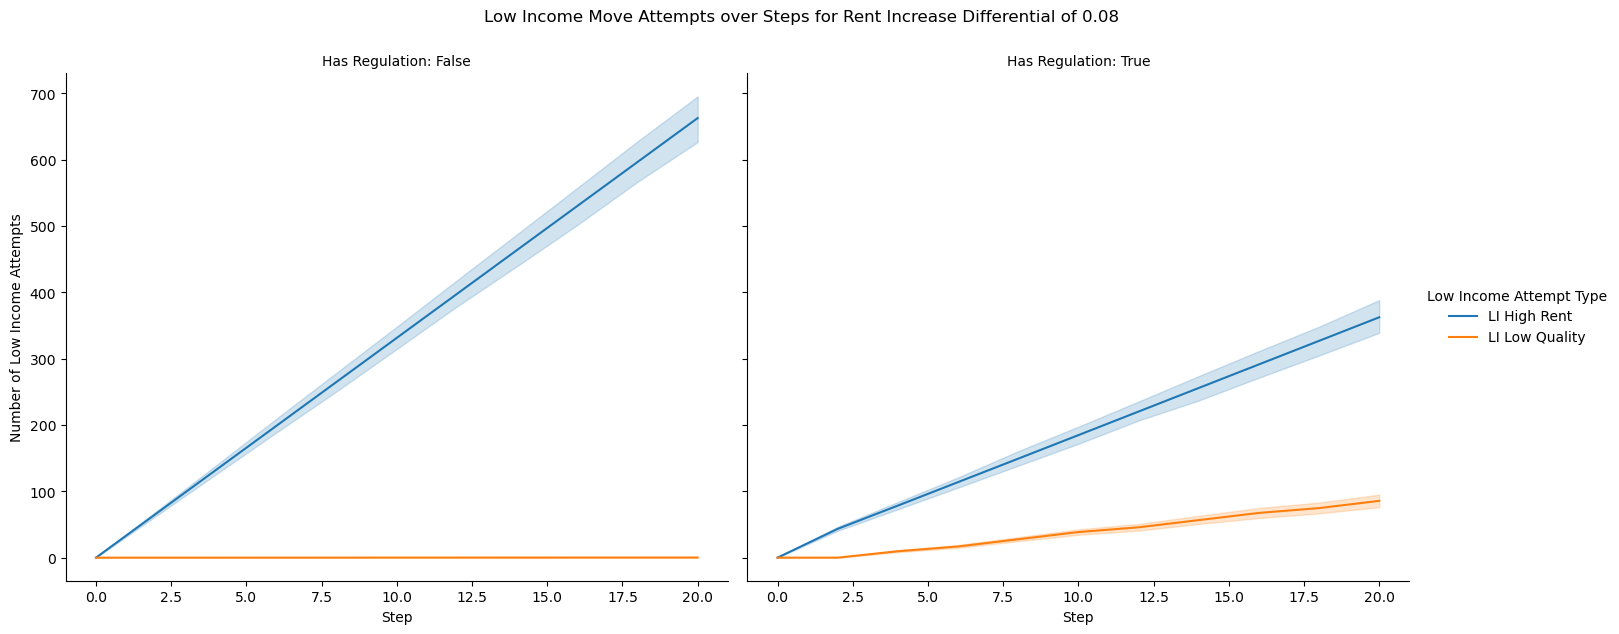

In [37]:
# Melt the dataframe for low income attempt variables
melted_li_attempt_data = pd.melt(filtered_data, 
                                 id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                                 value_vars=['attempt_li_high_rent', 'attempt_li_low_quality'],
                                 var_name='LI_Attempt_Type', 
                                 value_name='LI_Attempts')

# Rename the low income attempt type labels for clarity
melted_li_attempt_data['LI_Attempt_Type'] = melted_li_attempt_data['LI_Attempt_Type'].replace({
    'attempt_li_high_rent': 'LI High Rent',
    'attempt_li_low_quality': 'LI Low Quality'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_li_attempt_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='LI_Attempts', hue='LI_Attempt_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Number of Low Income Attempts')
g.add_legend(title='Low Income Attempt Type')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Low Income Move Attempts over Steps for Rent Increase Differential of 0.08', y=1.05)
plt.show()


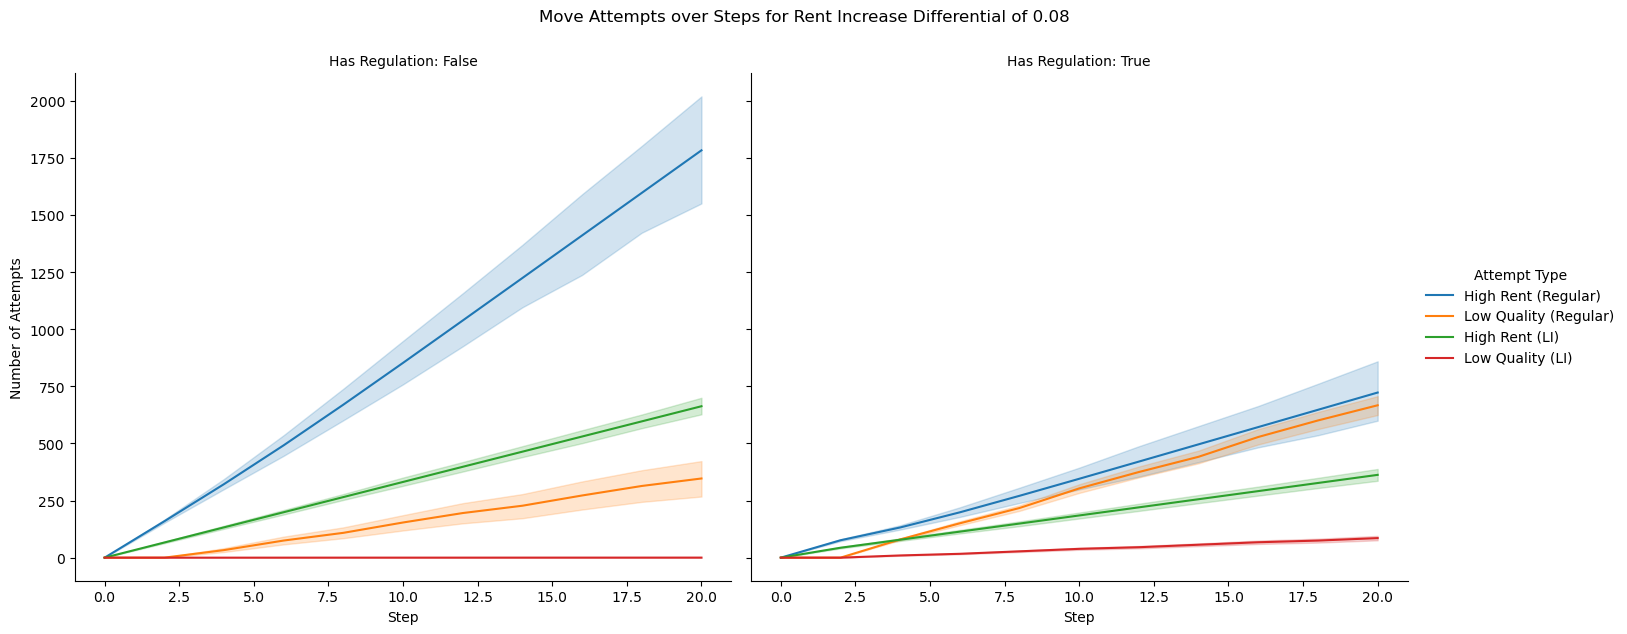

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset to keep only rows where rent_increase_differential is 0.08
filtered_data = grouped_data[grouped_data['rent_increase_differential'] == 0.08]

# Melt the dataframe for all attempt variables
melted_attempt_data = pd.melt(filtered_data, 
                              id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                              value_vars=['attempt_high_rent', 'attempt_low_quality', 'attempt_li_high_rent', 'attempt_li_low_quality'],
                              var_name='Attempt_Type', 
                              value_name='Attempts')

# Rename the attempt type labels for clarity
melted_attempt_data['Attempt_Type'] = melted_attempt_data['Attempt_Type'].replace({
    'attempt_high_rent': 'High Rent (Regular)',
    'attempt_low_quality': 'Low Quality (Regular)',
    'attempt_li_high_rent': 'High Rent (LI)',
    'attempt_li_low_quality': 'Low Quality (LI)'
})

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_attempt_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Attempts', hue='Attempt_Type', palette='tab10')

# Adding titles and labels
g.set_axis_labels('Step', 'Number of Attempts')
g.add_legend(title='Attempt Type')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Move Attempts over Steps for Rent Increase Differential of 0.08', y=1.05)
plt.show()


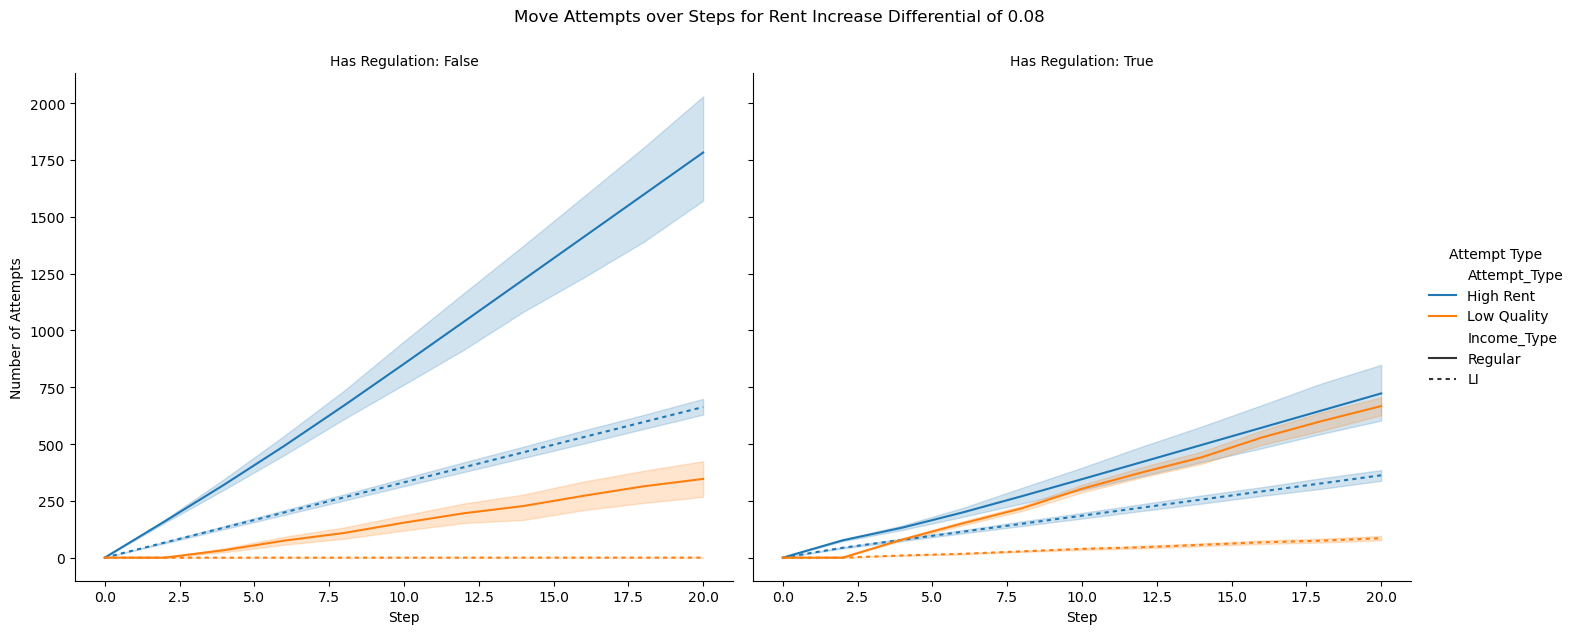

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset to keep only rows where rent_increase_differential is 0.08
filtered_data = grouped_data[grouped_data['rent_increase_differential'] == 0.08]

# Melt the dataframe for all attempt variables
melted_attempt_data = pd.melt(filtered_data, 
                              id_vars=['RunId', 'Step', 'has_regulation', 'num_month_rent_renovation', 'rent_increase_differential', 'max_complaint', 'rent_discount', 'init_num_people', 'base_decay_constant'],
                              value_vars=['attempt_high_rent', 'attempt_low_quality', 'attempt_li_high_rent', 'attempt_li_low_quality'],
                              var_name='Attempt_Type', 
                              value_name='Attempts')

# Rename the attempt type labels for clarity
melted_attempt_data['Attempt_Type'] = melted_attempt_data['Attempt_Type'].replace({
    'attempt_high_rent': 'High Rent',
    'attempt_low_quality': 'Low Quality',
    'attempt_li_high_rent': 'High Rent (LI)',
    'attempt_li_low_quality': 'Low Quality (LI)'
})

# Create a new column to differentiate by income type for styling
melted_attempt_data['Income_Type'] = melted_attempt_data['Attempt_Type'].apply(lambda x: 'LI' if '(LI)' in x else 'Regular')
melted_attempt_data['Attempt_Type'] = melted_attempt_data['Attempt_Type'].str.replace(' (LI)', '')

# Define line styles
line_styles = {'Regular': '', 'LI': (2, 2)}  # Solid line for Regular, Dashed line for LI

# Plotting using seaborn with facets for has_regulation
g = sns.FacetGrid(melted_attempt_data, col='has_regulation', height=6, aspect=1.2)

g.map_dataframe(sns.lineplot, x='Step', y='Attempts', hue='Attempt_Type', style='Income_Type', palette='tab10', dashes=line_styles)

# Adding titles and labels
g.set_axis_labels('Step', 'Number of Attempts')
g.add_legend(title='Attempt Type')
g.set_titles(col_template='Has Regulation: {col_name}')
g.fig.suptitle('Move Attempts over Steps for Rent Increase Differential of 0.08', y=1.05)
plt.show()


In [9]:
model_out.head(20)

mean_quality  \
0   (74.93141478673662, 78.69621853272474)   
1   (59.70347933901326, 58.58937493725615)   
2  (46.729218009878686, 44.42554392498006)   
3   (39.98989134511169, 38.98943965103999)   

                            mean_complaints  \
0                                (0.0, 0.0)   
1  (0.3902439024390244, 0.2903225806451613)   
2    (1.089430894308943, 1.032258064516129)   
3                 (2.0, 1.8387096774193548)   

                             mean_displacement  \
0                                   (0.0, 0.0)   
1  (0.008130081300813009, 0.16129032258064516)   
2  (0.008130081300813009, 0.16129032258064516)   
3  (0.016260162601626018, 0.16129032258064516)   

                      mean_housing_quality  \
0   (75.79329389061408, 75.55769880426837)   
1  (56.149053119651285, 65.03311404115583)   
2  (41.596241625063314, 55.97451998698327)   
3   (35.47035910223592, 48.69976687270712)   

                              mean_rent_price hh_low_quality  \
0  (0.08265517642205296, 0.41172595382907035)         (0, 0)   
1  (0.08041419032049867, 0.45019030007126826)        (30, 7)   
2   (0.08054096526541232, 0.4516482038340326)       (87, 23)   
3   (0.08054096526541232, 0.4516482038340326)       (82, 22)   

  hh_rent_regulation  movement  attempt  movement_li attempt_li  
0               None         0   (0, 0)            0     (0, 0)  
1               None        34  (40, 0)           13    (18, 0)  
2               None        37  (49, 0)           13    (23, 0)  
3               None        37  (56, 0)           13    (28, 0)

In [13]:
model_out2.head(20)

mean_quality  \
0  (77.45839171021626, 77.83408774795625)   
1  (62.49861910193313, 59.69238562770452)   
2  (49.72132636887081, 45.83644245954505)   
3   (43.10163420099897, 39.4273312481403)   

                             mean_complaints  \
0                                 (0.0, 0.0)   
1  (0.28346456692913385, 0.2222222222222222)   
2   (0.8976377952755905, 0.8888888888888888)   
3   (1.6929133858267718, 1.6296296296296295)   

                           mean_displacement  \
0                                 (0.0, 0.0)   
1  (0.06299212598425197, 0.2222222222222222)   
2  (0.06299212598425197, 0.2222222222222222)   
3  (0.06299212598425197, 0.2222222222222222)   

                      mean_housing_quality  \
0   (77.61594983644326, 77.45176194783879)   
1  (57.499309854355374, 66.66334929667964)   
2  (42.596536416730316, 57.37767647486193)   
3   (36.51908026563325, 49.98785822926197)   

                             mean_rent_price hh_low_quality  \
0  (0.08243809055841642, 0.4216451100304773)         (0, 0)   
1  (0.08085592666887394, 0.4478306553761623)        (24, 6)   
2  (0.08085592666887394, 0.4478306553761623)       (66, 18)   
3  (0.08085592666887394, 0.4478306553761623)       (76, 18)   

  hh_rent_regulation  movement  attempt  movement_li attempt_li  
0               None         0   (0, 0)            0     (0, 0)  
1               None        32  (46, 0)            9    (15, 0)  
2               None        32  (60, 0)            9    (21, 0)  
3               None        32  (74, 0)            9    (27, 0)

In [17]:
model_out3.head(20)

mean_quality  \
0   (71.41785322647779, 78.98401855182729)   
1  (65.66741003008566, 63.365842211553904)   
2   (55.81198824292467, 49.45078124675814)   
3  (52.293013172758926, 42.48666939440593)   

                            mean_complaints  \
0                                (0.0, 0.0)   
1  (0.4065040650406504, 0.2903225806451613)   
2    (0.983739837398374, 1.064516129032258)   
3   (1.7073170731707317, 1.903225806451613)   

                             mean_displacement  \
0                                   (0.0, 0.0)   
1  (0.032520325203252036, 0.12903225806451613)   
2   (0.04878048780487805, 0.12903225806451613)   
3   (0.14634146341463414, 0.12903225806451613)   

                     mean_housing_quality  \
0  (71.78985825679898, 74.64892842480492)   
1              (53.18323505679457, 100.0)   
2             (39.399109564872106, 100.0)   
3              (33.83060540693087, 100.0)   

                              mean_rent_price hh_low_quality  \
0  (0.08308839736512134, 0.43426448120828826)         (0, 0)   
1   (0.08283467431826753, 0.5178001300546995)        (33, 4)   
2   (0.08335912308725468, 0.5852894153658922)       (84, 18)   
3   (0.08360789185078459, 0.6502697383870524)       (67, 23)   

  hh_rent_regulation  movement  attempt  movement_li attempt_li  
0               None         0   (0, 0)            0     (0, 0)  
1               None        31  (39, 0)            9    (13, 0)  
2               None        42  (60, 0)            9    (17, 0)  
3               None        47  (87, 0)            9    (21, 0)

In [5]:
model_out4.head(20)

mean_quality  \
0   (79.81211069822248, 80.35120681926844)   
1  (69.21682719410741, 59.112336383414906)   
2   (56.67055456819716, 43.79149585990059)   

                              mean_complaints            mean_displacement  \
0                                  (0.0, 0.0)                   (0.0, 0.0)   
1  (0.30952380952380953, 0.39285714285714285)                   (0.0, 0.0)   
2                  (0.8650793650793651, 1.25)  (0.031746031746031744, 0.0)   

                     mean_housing_quality  \
0  (78.95845598670425, 81.57555450390247)   
1             (58.493862871845955, 100.0)   
2              (43.33331941352134, 100.0)   

                             mean_rent_price hh_low_quality  \
0  (0.0904756281569319, 0.43095323991668616)         (0, 0)   
1  (0.08887817126625489, 0.5087711027961875)        (20, 6)   
2   (0.0890262311430807, 0.5615462475867473)       (70, 23)   

  hh_rent_regulation  movement  attempt  movement_li attempt_li  
0         (196, 112)         0   (0, 0)            0     (0, 0)  
1          (222, 86)        33  (33, 0)           10    (10, 0)  
2          (224, 84)        41  (45, 0)           10    (10, 0)

In [7]:
model_out.columns.tolist()

['movement',
 'li_movement',
 'displaced',
 'li_displaced',
 'complaints',
 'li_complaints',
 'regulated_quality',
 'quality',
 'renovations']

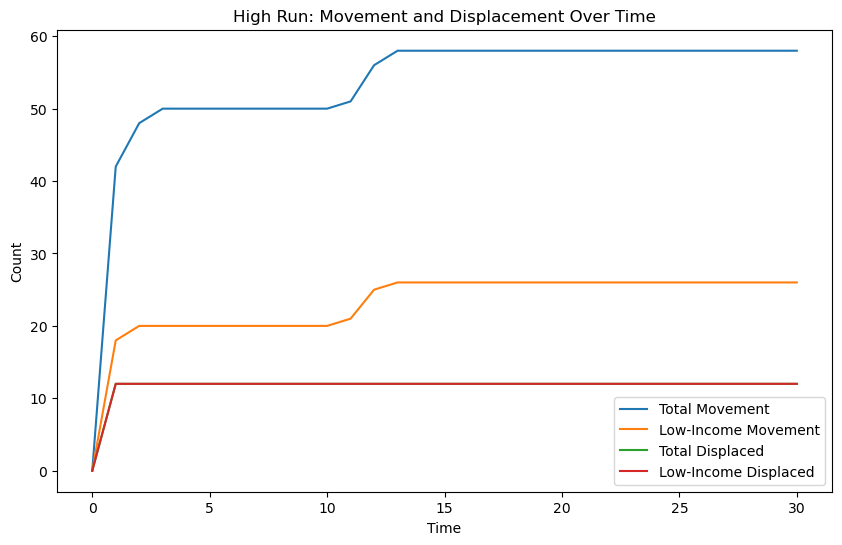

In [13]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model_out['movement'], label='Total Movement')
plt.plot(model_out['li_movement'], label='Low-Income Movement')
plt.plot(model_out['displaced'], label='Total Displaced')
plt.plot(model_out['li_displaced'], label='Low-Income Displaced')
plt.title('High Run: Movement and Displacement Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


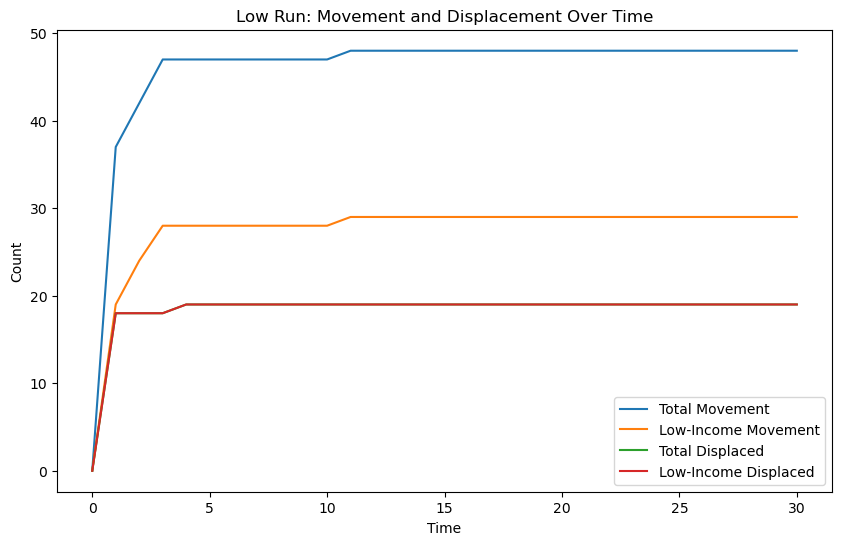

In [20]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model2_out['movement'], label='Total Movement')
plt.plot(model2_out['li_movement'], label='Low-Income Movement')
plt.plot(model2_out['displaced'], label='Total Displaced')
plt.plot(model2_out['li_displaced'], label='Low-Income Displaced')
plt.title('Low Run: Movement and Displacement Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

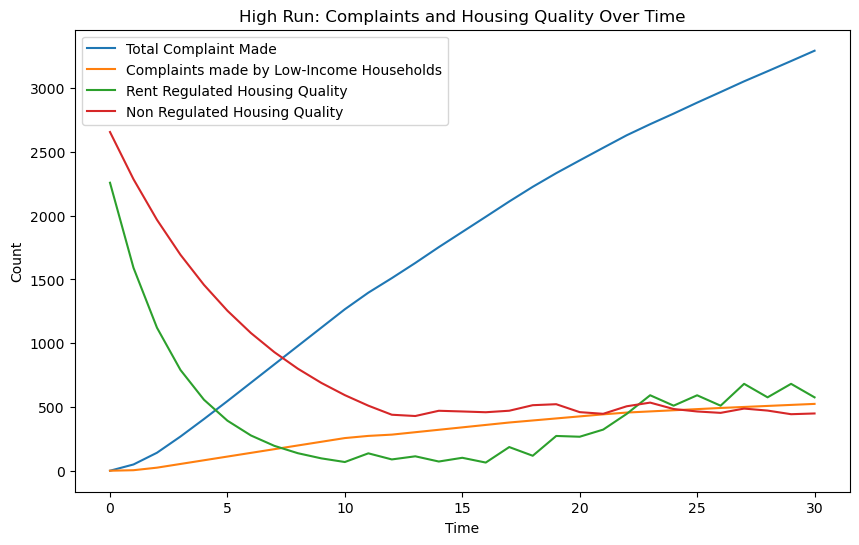

In [19]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model_out['complaints'], label='Total Complaint Made')
plt.plot(model_out['li_complaints'], label='Complaints made by Low-Income Households')
plt.plot(model_out['regulated_quality'], label='Rent Regulated Housing Quality')
plt.plot(model_out['quality'], label='Non Regulated Housing Quality')
plt.title('High Run: Complaints and Housing Quality Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


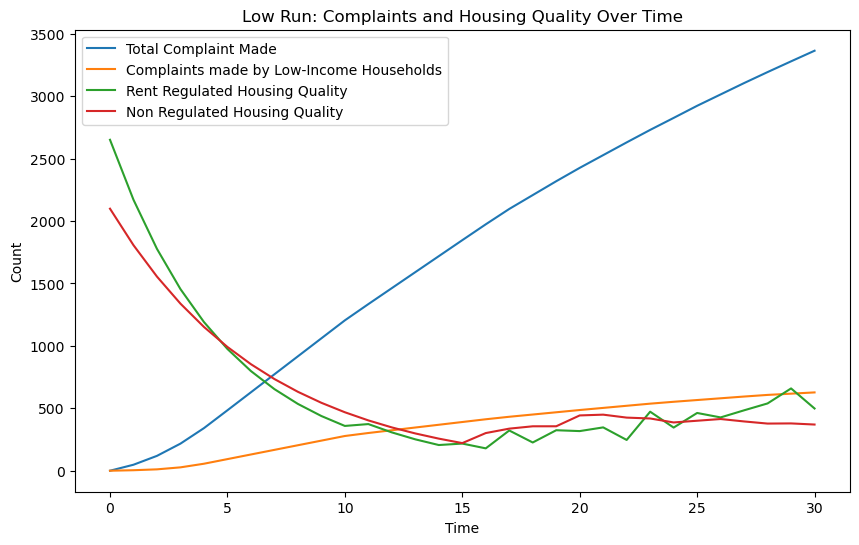

In [18]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model2_out['complaints'], label='Total Complaint Made')
plt.plot(model2_out['li_complaints'], label='Complaints made by Low-Income Households')
plt.plot(model2_out['regulated_quality'], label='Rent Regulated Housing Quality')
plt.plot(model2_out['quality'], label='Non Regulated Housing Quality')
plt.title('Low Run: Complaints and Housing Quality Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


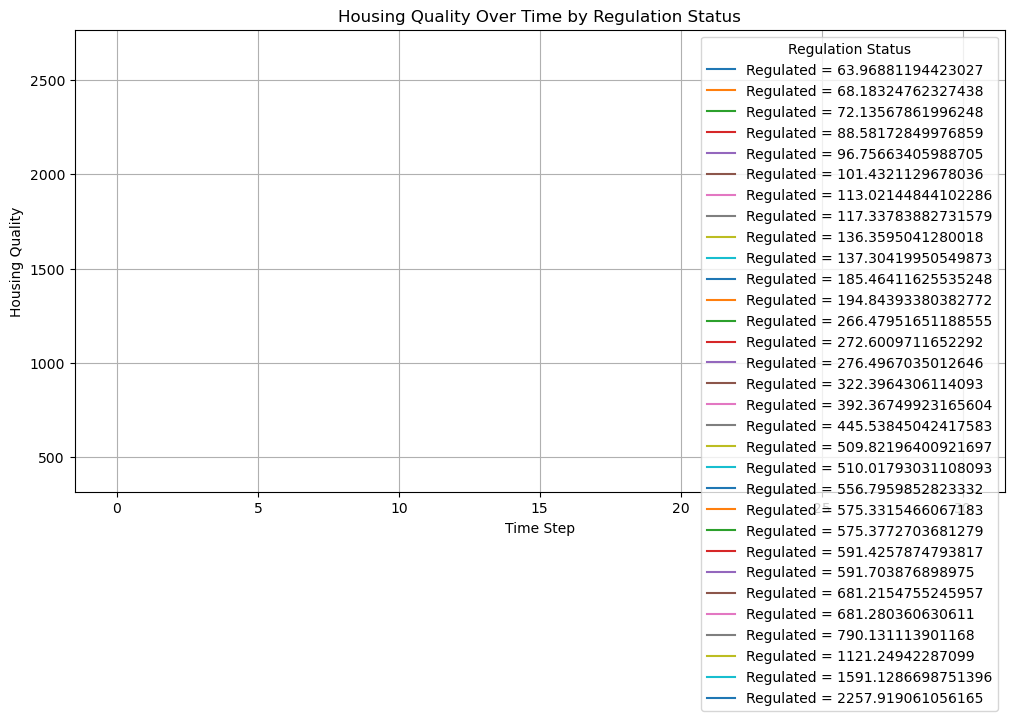

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the plot
plt.figure(figsize=(12, 6))
for label, df in model_out.groupby('regulated_quality'):
    plt.plot(df.index, df['quality'], label=f'Regulated = {label}')

plt.title('Housing Quality Over Time by Regulation Status')
plt.xlabel('Time Step')
plt.ylabel('Housing Quality')
plt.legend(title='Regulation Status')
plt.grid(True)
plt.show()


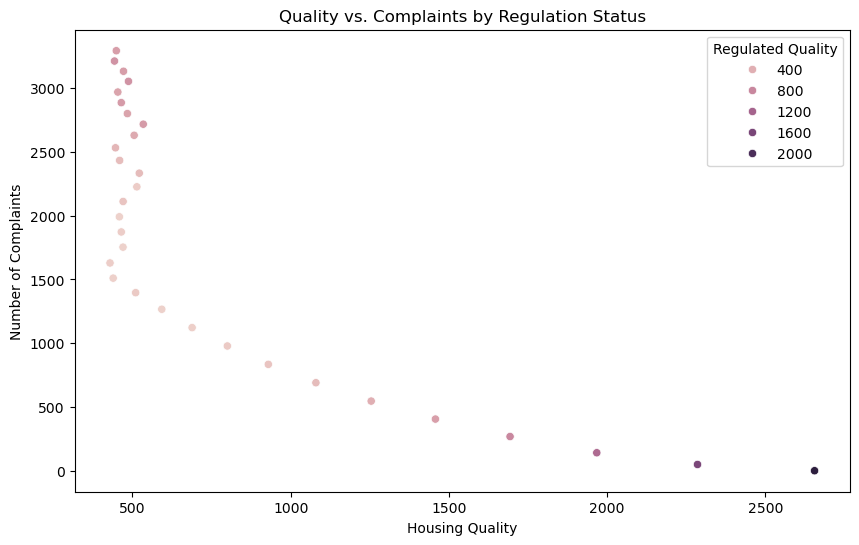

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_out, x='quality', y='complaints', hue='regulated_quality')
plt.title('Quality vs. Complaints by Regulation Status')
plt.xlabel('Housing Quality')
plt.ylabel('Number of Complaints')
plt.legend(title='Regulated Quality')
plt.show()


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7044590f29d0>


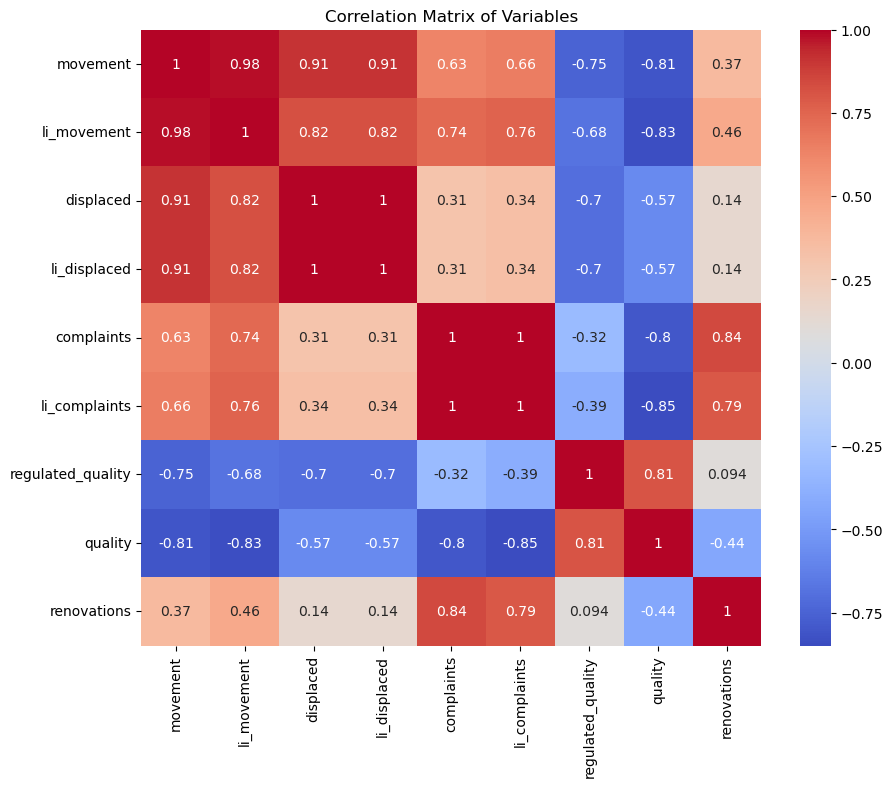

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(model_out.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


In [24]:
model2_out.head(20)

movement  li_movement  displaced  li_displaced  complaints  li_complaints  \
0          0            0          0             0           0              0   
1         45           28          9             9          57              2   
2         50           31         10            10         131              9   
3         50           31         10            10         237             32   
4         50           31         10            10         356             58   
5         50           31         10            10         489             89   
6         50           31         10            10         636            129   
7         50           31         10            10         783            169   
8         50           31         10            10         930            209   
9         50           31         10            10        1077            249   
10        50           31         10            10        1224            289   
11        50           31         10            10        1371            329   
12        50           31         10            10        1506            358   
13        52           32         10            10        1625            386   
14        52           32         10            10        1756            414   
15        52           32         10            10        1887            442   
16        52           32         10            10        2017            470   
17        52           32         10            10        2146            498   
18        52           32         10            10        2272            523   
19        52           32         10            10        2391            545   

    regulated_quality      quality  renovations  
0         2447.337865  1952.765173            0  
1         2106.443221  1598.788900            0  
2         1813.032482  1308.977640            0  
3         1560.491519  1071.700249            0  
4         1343.127498   877.433952            0  
5         1156.040550   718.382160            0  
6          995.013323   588.161567            0  
7          856.415904   481.545963            0  
8          737.123999   394.256489            0  
9          634.448506   322.789912            0  
10         546.074890   264.278028            0  
11         470.011013   216.372549            0  
12         484.348099   228.087491            2  
13         392.499180   219.415424            2  
14         382.140257   179.642155            3  
15         304.528075   147.078557            3  
16         306.422825   250.917196            7  
17         239.357478   375.871163           11  
18         333.863769   401.458057           17  
19         268.325735   385.532574           21

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11

<Axes: >

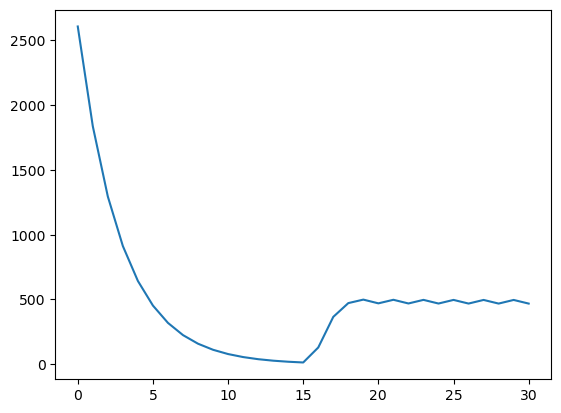

In [25]:
model_out.quality.plot()

<Axes: >

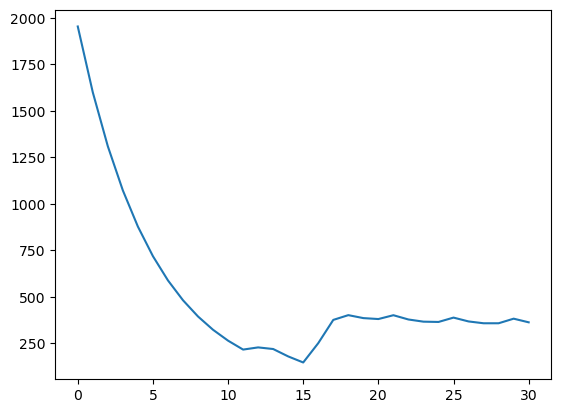

In [26]:
model2_out.quality.plot()

In [27]:
from mesa import batch_run
import numpy as np
import pandas as pd

# NOTE: You do not need this as a separate file BUT it can be nice to track
# can also call the file and it makes things a little cleaner as it runs

# Here you will have elements that you want to sweep, eg:
# parameters that will remain constant
# parameters you want to vary
parameters = {"rent_discount": 0.5,
              "init_num_people": 2,
              "base_decay_constant": 0.15,
              "decay_differential": np.linspace(0,0.5, 6),
              "max_complaint": range(2,8,1)} 


In [29]:
results = batch_run(GeoHousing, 
                    parameters,
                    iterations=50,  
                    max_steps=30, 
                    data_collection_period = 1,
                    number_processes = 6) #how often do you want to pull the data





## NOTE: to do data collection, you need to be sure your pathway is correct to save this!
# Data collection
# extract data as a pandas Data Frame
pd.DataFrame(results).to_csv("batch_data.csv")



  0%|          | 0/1800 [00:00<?, ?it/s]

DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona._env:GDAL_DATA f

KeyboardInterrupt: 

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [14]:
param_sweep.run_all()

80it [00:15,  3.13it/s]


In [15]:
df = param_sweep.get_model_vars_dataframe()

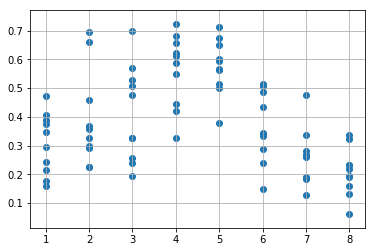

In [16]:
plt.scatter(df.homophily, df.Segregated_Agents)
plt.grid(True)